# 1. Human Capital Accumulation :

In [1]:
#import package
import random 
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import ipywidgets as widgets
from scipy import optimize
import pandas as pd
from scipy import optimize

#setting nice printing and seed
sm.init_printing(use_unicode=True)
np.random.seed(1)

# 1. Human capital accumulation

We use a mixture of methods to solve the questions is assigment 1. In the first question we solve the functions using sympy, and implement the functions manually. In question 2 and 3 the equations becomes more complicated to solve, and therefore we use numerical optimizers. 

In [2]:
# We need to define all the symbols that we wish to work with in sympy, as sm.symbols 
#Initialize symbols
rho = sm.symbols('rho')
beta = sm.symbols('beta')
gamma = sm.symbols('gamma')
w = sm.symbols('w')
b = sm.symbols('b')
delta = sm.symbols('Delta')
h1 = sm.symbols('h_1')
h2 = sm.symbols('h_2')
c1 = sm.symbols('c1')
c2 = sm.symbols('c2')
l1 = sm.symbols('l1')
l2 = sm.symbols('l2')
exp = sm.symbols('{E_1}[{v_2}(h_2)]')
u = sm.symbols("u")

**Question 1**

To solve the model for period 2, firstly we have to define the human capital, budget constraint and utility function :

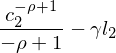

In [3]:
#define the utility of working, desutility of working and the total utility equation
## Utility of working
u2 = (c2**(1-rho))/(1-rho)
## Disutility of working
dis_u2 = gamma*l2
## Total utility
total_u2 = u2 - dis_u2

#define the consumption in period, as a function of wage, human capital and work/not work
c2_f = w*h2*l2

#show the total utility function
total_u2

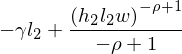

In [4]:
#substitute the budget constraint in the utility function
total_u2_sub2 = total_u2.subs(c2,c2_f)
total_u2_sub2

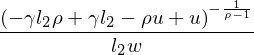

In [5]:
#solve the equation for human capital level
h2_sol = sm.solve(sm.Eq(total_u2_sub2,u),h2)[0]
h2_sol

Now that we have the equations of this model, we will define two functions. The first one will return the utility level given the parameters. The second one will return the human capital level. 

The budget constraint is not the same whether the agent works or lives with the benefits. Therefore we had to use an if else statement to distinguish both case in the utility function.

In [6]:
# define the total utility function
def utility_work(h2,l2,w,rho,gamma,b):
    """This function takes 6 required arguements, and returns utility given the values. Build on the basis of total_u2_sub2
        args: 
            h2 = Human capital level
            l2 = dummy variable for work or not. Should either be 1 or 0
            w = wage for working
            rho = Some parameter 
            gamma = some parameter determening the disutility of working 
            b = uenemployment benefts
            
            return the utility """
    #If worker works
    if l2 == 1 :
        #Estimate solition based on total_u2_sub2
        solution = (((h2*l2*w)**(1-rho))/(1-rho))-gamma*l2
    #If worker does not work
    else :
        #Estimate solution bases og total_u2_sub2, but replace consumbtion with benefits (b)
        solution = ((b**(1-rho))/(1-rho))-gamma*l2
    return solution

def hum_cap_u(l2,gamma,b,w,rho):
    """This function takes 5 arguments and return the human capital level. It is build on h2_sol
        args: 
            l2 = dummy for work or not. Should either be 0 or 1
            gamma = some parameter determening the disutility of not working
            b = unemployment benefits
            w = wages
            rho = some parameter
            returns human capital level given the parameters"""
    # We use h2_sol, but instead of the utility we plug in the utility of not working, as a "cutoff"-point for 
    #when the workerwill work. 
    #
    #Calculate the utility of not working 
    nw_u = utility_work(h2,0,w,rho,gamma,b)
    
    #Calculate the human capital level where the utility is higher for working than not
    hum_cap = ((-gamma*l2*rho+gamma*l2-rho*nw_u+nw_u)**-(1/(rho-1)))/(l2*w)
    
    return hum_cap

Now we wish to plot the model, to see how utility depends on human capital level

In [7]:
# set the given parameters of the model
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
delta = 0.1

In [8]:
# define a plot with the utility given the human capital
def plot_func(h2,w,rho,gamma,b):
    """This function takes 5 arguments and plots utility based on human captial, for both working and not working
        args:
            h2 = human capital
            w = wage
            rho = some parameter
            gamma = parameter determening the disutility of working
            b = unemployment benefits
            does not return anything, but prints a plot"""
    #Calculate the utility of working
    work = utility_work(h2,1,w,rho,gamma,b)
    
    #calculate the utility of not working
    not_work = utility_work(h2,0,w,rho,gamma,b)
    
    #Calculate the "cutoff"-point
    cutoff = hum_cap_u(1,gamma,b,w,rho)
    
    #plot work and not work
    plt.plot(h2,work,label = "Utility of working")
    plt.plot(h2,not_work,color="red",label="Utility of not working")
    plt.legend()
    
    plt.xlabel("Human capital")
    plt.ylabel("Utility")

    plt.show
    
    #Print the cutoff point
    print("The worker will supply labour if human capital is above",round(cutoff[0],2), "and no labour if it is below." )
    return 

To plot the utility we define two vectors. One for human capital level, and one for benefits. 

The worker will supply labour if human capital is above 0.56 and no labour if it is below.


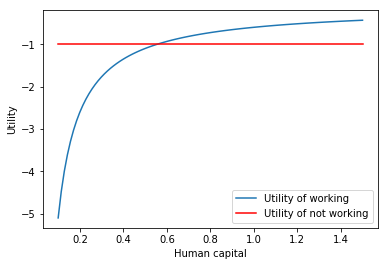

In [9]:
#define vectors
h_vec = np.linspace(0.1,1.5,100) 
b_vec = np.linspace(1,1,100)
plot_func(h_vec,w,rho,gamma,b_vec)

Here we can see a positive relation between human capital and the utility. This utility is negative, but the important interpertation is that it rises with level of human capital. The red line represents the utility from not working, therefore the human capital is lower than the level where the red line crosses the blue one, the agent will chose not to work.

Given this plot, we can assume that the agent will chose to work for a human capital level higher than 0.56. If it is not the case the agent should take the benefits and get -1 as utility from it.

In [10]:
#The human capital level of the cutoff
cutoff = hum_cap_u(1,gamma,b,w,rho)
print(round(cutoff,2),"human capital")

0.56 human capital


Another way to show this, and emphasize the cutoff, is to plot a graph with the labour supply on the y-axis. To do that we create a list (size 100). We assign 0 or 1 to this list depending on the value inside the human capital vector h_vec. If the value is higher than the cutoff we assign 1, which means the agent will work, or 0 in the other case.

In [11]:
#Create the list
willwork = list(range(100))

#Use a for loop to fill the list with (1) if the human capital i is above the cutoff or (0) if it is equal or below
for i in range(len(h_vec)): 
    #if utility of work higher than utility of not working
    if h_vec[i] > cutoff : 
        #Assing 1
        willwork[i] = 1
    else : 
        #Otherwise assign 0
        willwork[i] = 0

From these lists, now we plot the labour supply given the human capital :

<function matplotlib.pyplot.show(*args, **kw)>

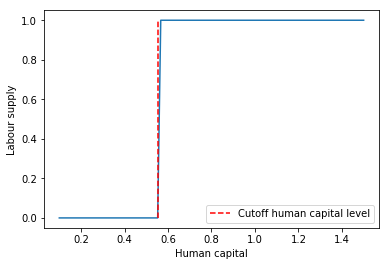

In [12]:
#We now wish to plot the cutoff in labour supply given the human capital
##Make a vector of the cutoff value 
cutoff_vec = np.linspace(cutoff,cutoff,100)

#plot the labour supply as a function of human capital
plt.plot(h_vec,willwork)

#Plot cutoff line
plt.plot(cutoff_vec,willwork,linestyle="dashed",color="red",label=("Cutoff human capital level"))
plt.legend()
plt.xlabel("Human capital")
plt.ylabel("Labour supply")

plt.show

If the reader wished to examine the "cutoff"-point for themselves, we have provided an interavtive slide below, where we show if the worker will supply labour at a given human capital level 

In [13]:
#the labour supply as a function of human captal is then:
def labour_supply(hum_cap,w,rho,gamma,b):
    """This function ins used for interaction between human capital and the cutoff point
        args: 
            hum_cap = human capital level
            w = wage
            rho = some parameter
            gamma = parameter determening disutility of not working
            b = benefits 
            returns laboursupply as either 1 or 0 """
    #calculate cutoff
    cutoff = hum_cap_u(1,gamma,b,w,rho)
    
    #if cutoff is lower than hum cap, print that the worker will work and assign 1
    if hum_cap > cutoff :
        print("with a human capital level of",hum_cap,"the worker wil supply 1 labour (l = 1)")
        l = 1
    #if cutoff is higher or equal to hum cap, print that the worker will not work and assign 0
    else :
        print("with a human capital level of",hum_cap,"the worker will supply 0 labour (l=0)")
        l = 0
    return l

In [14]:
#Create a slider with small float steps
human_capital = widgets.FloatSlider(min=0.1,max=1.5,value=0.1,step=0.01)
#Call interact on the function and fix all arguments except human capital
widgets.interact(labour_supply,hum_cap=human_capital,w=widgets.fixed(w),rho=widgets.fixed(rho),gamma=widgets.fixed(gamma),b=widgets.fixed(b))

interactive(children=(FloatSlider(value=0.1, description='hum_cap', max=1.5, min=0.1, step=0.01), Output()), _…

<function __main__.labour_supply(hum_cap, w, rho, gamma, b)>

**Question 2**

In [15]:
#We redefine some of the symbols that we have used earlier 
rho = sm.symbols('rho')
beta = sm.symbols('beta')
gamma = sm.symbols('gamma')
w = sm.symbols('w')
b = sm.symbols('b')
delta = sm.symbols('Delta')

Now that we have solved for period two we can do the same with the first period. We will begin, as before, by defining the utility, disutility and total utility equations and use them to create a utility function. 

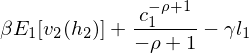

In [16]:
#define the utility, disutility and total utility equations for period 1
##Utility of working 
u1 = (c1**(1-rho))/(1-rho)
##Utility of not working
dis_u1 = gamma*l1

##Total utility
total_u1 = u1 - dis_u1 + beta*exp

#show total utility
total_u1

In [17]:
#set the parameters of the model as their numeric values
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
delta = 0.1

#define the utility function for period 2 
def utility_2(h1,w=1,l1=1,rho=2,gamma=0.1,beta=0.96,delta=0.1,b=1):
    """This function takes 8 arguments and return the utility of either working or not working 
        args: 
            h1 = human capital leve
            w = wage
            l1 = work dummy. Should be either 0 or 1 
            rho = some parameter
            gamma = parameter determening disutility of working 
            beta = discout factor 
            delta = human capital accumulation parameter
            b = benefits 
            return the utility """
    #If the worker works
    if l1 == 1:
        #calculate human capital leve in period 2 as a function of human capital level in period 1 
        h2 = h1+1 +(0.5*delta)
        #Substitute c for its components
        c = w*h1*1
        
        #Calculate expected utility in period 2
        u_p2 = utility_work(h2,1,w,rho,gamma,b)
        
        #Calculate the utility in period 1
        solution = ((c**(1-rho))/(1-rho))-gamma*1 +beta*u_p2
    else :
        #calculate human capital leve in period 2 as a function of human capital level in period 1 
        h2 = h1 + 0 + (0.5*delta)
        #Substitute c for benefits when not working
        c = b
        
        #Calculate expected utility in period 2
        u_nw_p2 = utility_work(h2,0,w,rho,gamma,b)
        
        #Calculate the utility in period 1
        solution = ((c**(1-rho))/(1-rho))-gamma*0 +beta*u_nw_p2
    
    return solution

We create two lists for the utility values when working and not working :

In [18]:
#Store the utility values given all the human capital values if agent works inside x
x = utility_2(h_vec,w,1,rho,gamma,beta,delta,b)

#Store the utility values given both h_vec and b_vec if the agent does not work
y = utility_2(h_vec,w,0,rho,gamma,beta,delta,b_vec)

The level of utility for not working in both periods is :

In [19]:
#The utility of not working 
y[0]

The function has become to complicated so solve symbolically, so we use a numerical optimzer to find the human capital level, where it makes sense to work. This is given if we mazimixe the utility function towards the cutoff point of -1.96

In [20]:
#We define objective function 
def objective(h):
    #This is given as the utility function
    return utility_2(h,w,1,rho,gamma,beta,delta,b)
#Definin constraints
def constraint(h):
    #The constraints are the cutoff point + the utility, as the utilities are negative 
    return (1.96 + utility_2(h,w,1,rho,gamma,beta,delta,b))

In [21]:
#Define constraints as a dictionary
cons = ({"type": "ineq","fun":constraint})
#Initial valie of human capital leve set to 0.1
h_init = 0.1
#Use mimimize to optimze and print solution
sol = optimize.minimize(objective,h_init,method="SLSQP",constraints=cons)
sol

     fun: -1.9599999941585289
     jac: array([4.28598835])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.35172508])

In [22]:
#The cutoff level of human capital is given as
sol.x[0]

We wish to plot this similar to in question 1, so we do below.

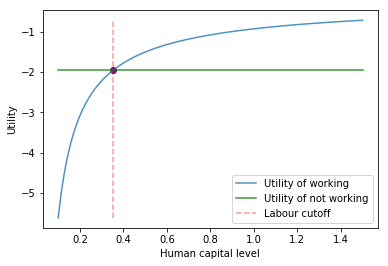

In [23]:
#define a plot with the utility given the human capital
##define cutoff human capital as a vector to a line can be plottet
cutoff = np.linspace(sol.x[0],sol.x[0],100)
##Plot utility of working
plt.plot(h_vec,x, label = "Utility of working",alpha= 0.8)
##Plot utility of not working
plt.plot(h_vec,y, color="green", label = "Utility of not working",alpha= 0.8)
##Plot the cutoff level of human capital
plt.plot(cutoff,x,color = "red", linestyle = "dashed",label="Labour cutoff",alpha= 0.4)
##Plot a dot in the intersection bestween the cutoff human capital and the utility fuction for working
plt.scatter(cutoff[0],y[0],color="purple",alpha = 1)
plt.xlabel("Human capital level")
plt.ylabel("Utility")
plt.legend()
plt.show()

As before, we will plot the cutoff with the same way. We create a list and assign 0 or 1 given the human capital value (if it is higher or lower than the cutoff). After that we will plot these both list to get the labour supply given the human capital.

In [24]:
#Create the list
willwork_p1 = list(range(100))

#Use a for loop to fill the list with (1) if the human capital i is above the cutoff or (0) if it is equal or below 
for i in range(len(h_vec)): 
    #If utiliy of working is strictly higher than utility of not working, assign 1
    if utility_2(h_vec[i],w,1,rho,gamma,beta,delta,1) > utility_2(h_vec[i],w,0,rho,gamma,beta,delta,1) : 
        willwork_p1[i] = 1
    else : 
        #Else assign 0
        willwork_p1[i] = 0

Text(0, 0.5, 'Labour supply')

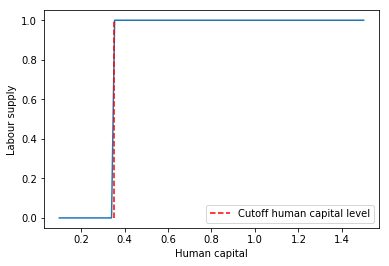

In [25]:
#plot the cutoff in labour supply given the human capital
##Plot labour supply 
plt.plot(h_vec,willwork_p1)
## plot the cutoff human capital level as a red dashed line
plt.plot(cutoff,np.linspace(0,1,100),linestyle = "dashed",color="red",label=("Cutoff human capital level"))
plt.legend()
plt.xlabel("Human capital")
plt.ylabel("Labour supply")

This means that the worker will chose to supply her labour if her human capital level is above 0.35. If the human capital is under, she won't chose to work and live from the benefits. 

## Question 3

We will examine if workers will ever work if their wage is lower than the unemployment benefits. In this case the unemployment benefits are given as 1. It is theoretically possible that a worker would chose to work, if the accumulation of human capital can more than make up for the loss in utility. To test this we chose a list of the possible wages below 1, and test if there is a human capital level, where the utility of working is higher than not working

In [26]:
#We define a list of different wage levels to examine 
wages = np.linspace(0,0.99,100)

In [27]:
#parameters
rho = 2
beta = 0.96
gamma = 0.1
b = 1
delta = 0.1
h_vec = np.linspace(0.1,1.5,100)

We create a for loop to test if the utility gained from working, even if wages are lower than b, is higher than the utility gotten when not working in both periods (which was -1.96).

In [28]:
#For-loop that tests if utility from working is higher than not working for a wage lower than the benefits

#Initate. Looping over alle possibel wages under 1 2 decials (that is the highest we test is 0.99)
for wage in wages: 
    #define a name for outputting
    name = "wage_" + str(round(wage,2))
    
    #Calculate the cutoff. This depends on the wage so it has to be done inside loop. 
    ## this is a list as we use h_vec which contain all levels of human capital
    cutoff_w = utility_2(h1 = h_vec, w = wage, l1 = 1, rho = 2, gamma = 0.1, beta= 0.96, delta = 0.1, b = 1)
    
    #Check if the maximum utility given the wage is higher that -1.96, the utility of not working 
    if max(cutoff_w) > -1.96:
        #If it is print the name 
        print(name) 
        #This will be the lowest wage where it is profitable to work 
        ##Therefore break, as any higher wage will be redundant to calculate
        break

wage_0.6


C:\Users\augus\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in reciprocal
  app.launch_new_instance()
C:\Users\augus\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in reciprocal


It turns out that it could be profitable for the worker to work even if the wage is 0.6 while the unemployment benefits are 1 if the human capital is high.

To illustrate this result, we plot the utility given the human capital for a wage equal to 2 and a wage equal to 0.6. We also print the cutoff to show when it is better to work.

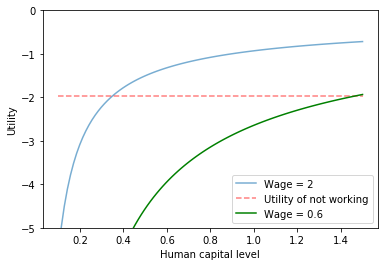

In [29]:
#define a plot with the utility given the human capital

#plot the utility function as wage level 2
plt.plot(h_vec,x, label = "Wage = 2",alpha= 0.6)
#plot the utility of not working
plt.plot(h_vec,y, color = "red", linestyle = "dashed",alpha= 0.5, label = "Utility of not working")
#Plot the utility of working when wages are 0.6
plt.plot(h_vec,cutoff_w, color = "green", label = "Wage = 0.6")
plt.xlabel("Human capital level")
plt.ylabel("Utility")
#Set new limits
plt.ylim(-5,0)
plt.legend()
plt.show()

It is evident that at very high levels of human capital, it can be rational to work, even if the wage is lower than the 
unemployment benefits. From our loop before we know that the lowest wage where this is true is 0.6. Therefore we 
use optimization to find the human capital level at which i makes sense to work if your wage is 0.6. 


In [30]:
#define the objective. Againg this is the utility function
def objective(h):
    #Insert 0.6 as wage into function
    return utility_2(h,0.6,1,rho,gamma,beta,delta,b)

#Define the constraint function. This is again 1.96 + the utility as utility is negative
def constraint(h):
    #Insert 0.6 as wage into function
    return (1.96 + utility_2(h,0.6,1,rho,gamma,beta,delta,b))

In [31]:
cons = ({"type": "ineq","fun":constraint})
h_init = 0.1
sol = optimize.minimize(objective,h_init,method="SLSQP",constraints=cons)
sol

     fun: -1.960000000389105
     jac: array([1.01749761])
 message: 'Optimization terminated successfully.'
    nfev: 27
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.47461354])

In [32]:
#The human capital where it makes sense to work, at a wage of 0.6 is: 
sol.x[0]

This is not the limit 1.5, so to be sure we test that the a wage of 0.59 does not have an assosiated human capital level where the worker would work. 

In [33]:
# I test that there is no wage value below 0.6 where the worker would work 
w = 0.59
#We only use 2 decimal so 0.59 is the closest to 0.6 

#Same as before, define objective function
def objective(h):
    return utility_2(h,w,1,rho,gamma,beta,delta,b)
#Define cnstriants
def constraint(h):
    return (1.96 + utility_2(h,w,1,rho,gamma,beta,delta,b))
#Make it into a dictionary
cons = ({"type": "ineq","fun":constraint})
#Intial value of human capital
h_init = 0.1

#Solve 
sol = optimize.minimize(objective,h_init,method="SLSQP",constraints=cons)

#Check if the solutions is lower than the limit of 1.5
if sol.x[0] > 1.5:
    print("No level of human capital where the worker would work, at human capital level of",str(w))
else: 
    print("The worker til work if she has a human capital level of", str(sol.x[0]))

No level of human capital where the worker would work, at human capital level of 0.59


So the worker will work at a wage of 0.6, if she has a human capital level of 1.47 or higher. But not if she has a wage of 0.59

We will plot the utility function at different wage levels in order to show how the workes calculation changes based on the wages. 

In [34]:

# Define wages to plot - chosen for nice visual and intuitive representateion
wages = [0.6,0.7,0.8,0.9,0.99]

# And the parameters again
rho = 2
beta = 0.96
gamma = 0.1
b = 1
delta = 0.1 
h_vec = np.linspace(0.1,1.5,100)

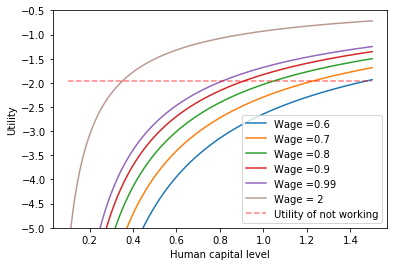

In [35]:
#Initiate a for loop, for each wage in the defines wages list
for wage in wages: 
    #Calculate the utility function of working at each wage level    
    wage_vec = utility_2(h1 = h_vec, w = wage, l1 = 1, rho = 2, gamma = 0.1, beta= 0.96, delta = 0.1, b = 1)
    #plot the function ans assing a name corresponding to the wage level
    plt.plot(h_vec,wage_vec, label = "Wage ="+str(wage))
#plot the utility at wage 2
plt.plot(h_vec,x, label = "Wage = 2",alpha= 0.6)
#plot utility of not working
plt.plot(h_vec,y, color = "red", linestyle = "dashed",alpha= 0.5, label = "Utility of not working")
plt.xlabel("Human capital level")
plt.ylabel("Utility")
plt.ylim(-5,-0.5)
plt.legend()
plt.show()

The respective "cutoff"-levels of human capital can be calculated using numerical optimazation 

In [36]:
#Initiate a for-loop for each of the wages in our wages list
for wage in wages:
    #assing wage to w
    w = wage 
    #Then define an objective function with the given wage
    def objective(h):
        return utility_2(h,w,1,rho,gamma,beta,delta,b)
    #Then define the constraints with the given wage
    def constraint(h):
        return (1.96 + utility_2(h,w,1,rho,gamma,beta,delta,b))
    #Constriants as a dictionary
    cons = ({"type": "ineq","fun":constraint})
    #Define initial guess
    h_init = 0.1
    
    #Solve the optimazation
    sol = optimize.minimize(objective,h_init,method="SLSQP",constraints=cons)
    #Print the cutoff level of human capital and the wage level
    print("Human capital level =",round(sol.x[0],2),"with wages =", wage)

Human capital level = 1.47 with wages = 0.6
Human capital level = 1.23 with wages = 0.7
Human capital level = 1.05 with wages = 0.8
Human capital level = 0.91 with wages = 0.9
Human capital level = 0.81 with wages = 0.99


# 2. AS-AD Model :

To solve assignment 2 we primarily use the sympy functionality. Towards the end we use some some numerical optimization.  

In [37]:
#All the symbold we wish to use for symbolic calculations are defined as sm.symbols 
alpha = sm.symbols('alpha')
b = sm.symbols('b')
gamma = sm.symbols('gamma')
h = sm.symbols('h')
phi = sm.symbols('phi')
yt = sm.symbols('y_t')
pit = sm.symbols('pi_t')
pit_m1=sm.symbols('pi_t-1')
yt_m1 = sm.symbols('y_t-1')
vt = sm.symbols('v_t')
st = sm.symbols('s_t')
st_m1 = sm.symbols('s_t-1')
rt = sm.symbols('r_t')
it = sm.symbols('i_t')
exp_pit = sm.symbols('E[pi_t]')
exp_pit_p1 = sm.symbols('E[pi_t+1]')

**Question 1**

Now that we have the symbols let's write the SRAS curve with them :

In [38]:
# Write the SRAS base equation
SRAS_pit=pit_m1-phi*gamma*yt_m1+st-phi*st_m1+gamma*yt
SRAS_pit

We do the same with the AD curve :

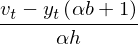

In [39]:
# Write the AD base equation
AD_pit=(1/(h*alpha))*(vt-(1+b*alpha)*yt)
AD_pit

Now we will equalize SRAS and AD to find the equilibrium values. To do that we substract one from the other (which is the same as equalizing them):

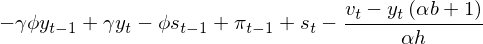

In [40]:
# SRAS equation minus the AD equation
AS_minus_AD= SRAS_pit-AD_pit
AS_minus_AD

We solve this equation for $y_t$ :

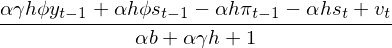

In [41]:
# Solve the equation for yt
eq_y = sm.solve(sm.Eq(AS_minus_AD,0),yt)
eq_y[0]

We get the equation of the equilibrium output $y_t$ which depends on $\alpha , \phi ,\gamma , h, b, \pi_{t-1} ,s_{t-1} ,y_{t-1} ,v_t$ and $s_t $.

Now that we have the equilibrium equation of the output, let's insert it in the SRAS curve :

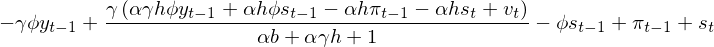

In [42]:
# Substitute the new output equation to replace yt
eq_pi= SRAS_pit.subs(yt,eq_y[0])
eq_pi

We obtain the equation of the equilibrium inflation which depends on $\gamma ,\phi , s_t ,\pi_{t-1} ,y_{t-1}$ and $s_{t-1}$

**Question 2**

We want to find the output and inflation for the equilibrium and see the evolution when there is a demand disturbance.
To do that we will create a dictionary for the parameters of this question, and create two functions for the output and inflation from the equation we found previously. We will use these functions to get the output and inflation levels in the equilibrium and after a shock and plot the results.

First of all we create a dictionary to enter the value of our parameters ($\alpha$, $h$, $b$, $\phi$, $\gamma$) :

In [43]:
# Initialization of the dictionary
pms = {}

# Enter the parameters and their values
pms['alpha']=5.76
pms['h'] = 0.5
pms['b'] = 0.5
pms['phi'] = 0
pms['gamma'] = 0.075
pms

{'alpha': 5.76, 'h': 0.5, 'b': 0.5, 'phi': 0, 'gamma': 0.075}

From the equation of the output we found in question one ( "eq_y" ), we create a function by using lambdify.

In [44]:
# Our eq_y is a list, therefore we need to consider only the first element of it to use the lambdify function.
equil_output= sm.lambdify((vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma),eq_y[0])

# Define the function
def equili_output (vt, st, pit_m1, st_m1, yt_m1, alpha=pms['alpha'], h=pms['h'], b=pms['b'], phi=pms['phi'], gamma=pms['gamma']):
    """
    This function take five parameters plus five others which are by default define in the dictionary called "pms" and
    return the output of the economy.
    
        args :  vt (float) : the demand disturbance in period t
                st (float) : the supply disturbance in period t
                pit_m1 (float) : the inflation in period t-1
                st_m1 (float) : the supply disturbance in period t-1
                yt_m1 (float) : the output in period t-1
        
        return (float) : The output yt of the economy for the period t.
    
    """
    return equil_output (vt, st, pit_m1, st_m1, yt_m1, alpha, h, b, phi, gamma)

Now let's enter values of the variables at the equilibrium, which means $v_t = s_t = \pi_{t-1} = s_{t-1} = y_{t-1} = 0$ :

In [45]:
equili_output(0,0,0,0,0)

The output is zero ($y_t = 0$) which makes sense given that all the other variables are equal to 0.

Now let's see what would be the impact of a positive demand disturbance on the production. For that let's just set $v_t = 0.1$ instead of 0 :

In [46]:
equili_output(0.1,0,0,0,0)

When there is a positive disturbance of the demand $v_t$ we can observe an increase in the output. Indeed an increase in demand will stimulate the economy, the supply will adapt to the demand, increase as well, leading to more production.

Now let's see the impact of the demand disturbance on the **inflation** :

As before we use the inflation equation we found in question one ( "eq_pi" ) to create a function.

In [47]:
# Use lambdify on the inflation equation eq_pi
equil_pi= sm.lambdify((st, yt, pit_m1, st_m1, yt_m1, gamma, phi),SRAS_pit)

# Define the function
def equili_pi (st, yt, pit_m1, st_m1, yt_m1, gamma=pms['gamma'], phi=pms['phi']):
    """
    This function take five parameters plus two others which are by default define in the dictionary called "pms" and
    return the inflation of the economy.
    
        args :  st (float) : the supply disturbance in period t
                yt (float) : the output in period t
                pit_m1 (float) : the inflation in period t-1
                st_m1 (float) : the supply disturbance in period t-1
                yt_m1 (float) : the output in period t-1
        
        return (float) : The inflation pit of the economy for period t.
    
    """
    return equil_pi (st, yt, pit_m1, st_m1, yt_m1, gamma, phi)

In [48]:
equili_pi(0,0,0,0,0)

At the equilibrium, when $v_t = s_t = \pi_{t-1} = s_{t-1} = y_{t-1} = 0$ the inflation is zero ($\pi_t = 0$). 
Regarding the demand disturbance, it is not involved in the inflation equation, however its impact increased the output in period t. This increase in output will impact the inflation : 

In [49]:
equili_pi(0,0.0244140625,0,0,0)

The positive disturbance on the demand also increases the inflation.
We can summarize the effect of this disturbance as follows:
   1. The positive shock on $v_t$ leads to a higher demand
   2. The supply and the demand adjust on a higher production and therefor a higher output $y_t$
   3. Finally, a higher output leads to inflation, an increase in $\pi_t$

**Question 3**

In this question we introduce a demand and a supply shock inside the demand and supply disturbance. Now both these variables become a function of shocks and some parameters. 

In theses conditions we want to know how the economy will evolve, starting from the equilibrium, if there is a demand shock in the first period. To answer this question we will first adapt our model to the new definitions of $v_t$ and $s_t$.

Now we have two new parameters ($\delta$, $\omega$) and $v_t$ and $s_t$ which became functions. We have to set up this new configuration:

In [50]:
#add the new parameters into the dictionary
pms["delta"] = 0.80
pms["omega"] = 0.15

#define the new symbols
delta = sm.symbols("delta")
omega = sm.symbols("omega")
vt_m1 = sm.symbols("v_t-1")
xt = sm.symbols("x_t")
ct = sm.symbols("c_t")

#define the new vt and st equation
vt_ar = delta*vt_m1 + xt
st_ar = omega*st_m1 + ct

To deal with these changes, we have to replace our $v_t$ in the output equation by the new one which is vt_ar :

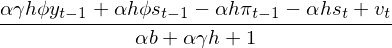

In [51]:
#The output equilibrium equation (our previous equation):
eq_y[0]

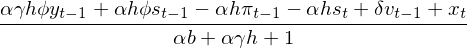

In [52]:
#substitute vt by vt_ar
eq_y_ar = eq_y[0].subs(vt,vt_ar)
eq_y_ar

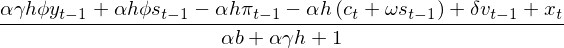

In [53]:
#substitute st by st_ar
eq_y_ar2 = eq_y_ar.subs(st, st_ar)
eq_y_ar2

We have to do the same in the SRAS equation, by replacing $s_t$ by st_ar:

In [54]:
#The SRAS equation (our previous equation):
SRAS_pit

In [55]:
#substitute st by st_ar
eq_pi_ar = SRAS_pit.subs(st,st_ar)
eq_pi_ar

Now that we changed our equation, we also have to make these changes inside our previous functions :

In [56]:
#create a new output function, with the new parameters
## This function is the aurtoregressive equivilant of the output function defines earlier 
equil_output2= sm.lambdify((vt_m1, pit_m1, st_m1, yt_m1, ct, xt, alpha, h, b, phi, omega, gamma, delta),eq_y_ar2)
def equili_output_ar (vt_m1, pit_m1, st_m1, yt_m1, ct, xt, alpha=pms['alpha'], h=pms['h'], b=pms['b'], phi=pms['phi'], omega=pms['omega'], gamma=pms['gamma'], delta=pms['delta']):
    return equil_output2 (vt_m1, pit_m1, st_m1, yt_m1, ct, xt, alpha, h, b, phi, omega, gamma, delta)

In [57]:
#create a new inflation function, with the new parameters
## This function is the aurtoregressive equivilant of the inflation function defines earlier 
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_ar (yt_m1, yt, pit_m1, st_m1, ct, omega=pms['omega'], gamma=pms['gamma'], phi=pms['phi']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

In [58]:
#test at the initial state
equili_pi_ar(0,0,0,0,0)

Now let's enter the new output value to get the new inflation value:

In [59]:
equili_pi_ar(0,equili_output_ar(0,0.1,0,0,0,0,0), 0, 0, 0)

In [60]:
equili_output_ar(0,0,0,0,0.1,0)

In order to examine how an output shock would affect the system we initiate a for-loop for the 100 periods we wish to model, and let the parameters evolve according to the functions

In [61]:
#define the number of time period
T = 100


#Define shock and intial parameters
shock = 0.1
pi_m = 0
yn = 0
y_m = 0

#Define list to input our results in
list_output = list(range(100))
list_inflation = list(range(100))


In [62]:
#create a loop to see the evolution of output and inflation
for i in range(100):
    
    #If it is the second period 
    if i == 1 :
        #Calculate output
        y = equili_output_ar(0,pi_m,0,y_m,0,shock)
        #record output in this period
        list_output[i] = y
        #define output for next period
        yn = y
       
        
        #calculate inflation
        p = equili_pi_ar(y_m,yn,pi_m,0,0)
        #record inflation in this period
        list_inflation[i] = p  
        #define lagged inflation
        pi_m = p
        #define lagged output
        y_m = y
       
    #If the period is not the first or second
    elif i> 1 :
        #Calculate output
        y = equili_output_ar(0,pi_m,0,y_m,0,0)
        #Record output
        list_output[i] = y
        #define output for next period
        yn = y

        #calculate inflation
        p = equili_pi_ar(y_m,yn,pi_m,0,0)
        #record inflation in this period
        list_inflation[i] = p  
        
        #define lagged inflation
        pi_m = p
        #define lagged output
        y_m = y
    
    #If it is the intial period, that is where the shock is 0
    else : 
        #Calculate output before any shocks
        y = equili_output_ar(0,0,0,0,0,0)
        #Record output
        list_output[i] = y
        #define output for next period
        yn = y
        
        #calculate inflation
        p = equili_pi_ar(y_m,yn,pi_m,0,0)
        #record inflation in this period
        list_inflation[i] = p
        
        #define lagged inflation
        pi_m = p
        #define lagged output
        y_m = y

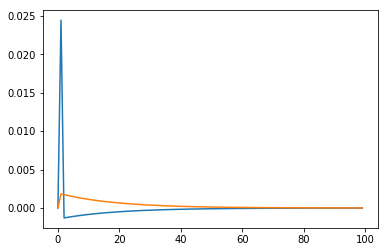

In [63]:
#Here we plot both output and inflation over 100 periods - They converge to 0 (conditional mean), after about 60 periods
plt.plot(list_output)
plt.plot(list_inflation)


**Question 4**

Now we wish to simulate the ASAD in a 1000 periods, with gaussian shock to both inflation and output

In [64]:
#We define new given paramters 
pms['sigma_x'] = 3.492
pms['sigma_c'] = 0.2
pms["delta"] = 0.80
pms["omega"] = 0.15


In [65]:
#We make a function tha simulates our ASAD model for 1000 periods. The amound of periods is fixed, but could be generalized
def simulation(v_m=0, s_m=0) :
    """This function takes 0 requried arguments, and two optional. It return two list: one of simulated output and one of 
        inflation."""
    
    #Set the seed
    np.random.seed(1)
    
    #define paramters. This could be generalized 
    pi_m = 0
    yn = 0
    y_m = 0
    
    #Drawing 1000 random numbers for both inflation and output shocks
    xt = np.random.normal(loc=0,scale=pms['sigma_x'],size=1000)
    ct = np.random.normal(loc=0,scale=pms['sigma_c'],size=1000)

    
    #Defining list space
    list_output = list(range(1000))
    list_inflation = list(range(1000))
    
    #Initating a for-loop
    for i in range(1000):
        #for each period in a 1000 periods
        
        #If it is the first period
        if i == 0 :
            #Calculate the output
            y = equili_output_ar(v_m,pi_m,s_m,y_m,ct[i],xt[i])
            #record it 
            list_output[i] = y
            #Define output in period
            yn = y
            
            #Calculate inflaiton
            p = equili_pi_ar(y_m,yn,pi_m,s_m,ct[i])
            #record it
            list_inflation[i] = p  
            
            #Define lagged inflation
            pi_m = p
            #Define lagged output
            y_m = y
            
            #calculate autoregressive parameters, these are given by the shock + the parameter last period times a paramter
            v_m = pms["delta"] * v_m + xt[i]
            s_m = pms["omega"] * s_m + ct [i]
        
        #If it is any other period
        else :
            #Calculate the output
            y = equili_output_ar(v_m,pi_m,s_m,y_m,ct[i],xt[i])
            #record it 
            list_output[i] = y
            #Define output in period
            yn = y
            
            #Calculate inflaiton
            p = equili_pi_ar(y_m,yn,pi_m,s_m,ct[i])
            #record it
            list_inflation[i] = p  
            
            #Define lagged inflation
            pi_m = p
            #Define lagged output
            y_m = y
             #calculate autoregressive parameters, these are given by the shock + the parameter last period times a paramter
            v_m = pms["delta"] * v_m + xt[i]
            s_m = pms["omega"] * s_m + ct[i]

    return list_inflation, list_output

In [66]:
#We store the inflation and output is an array called data, and in two seperat lists
data = simulation()
inflation = data[0]
output = data[1]

### Statistics for the simulated model

In [67]:
#We use numpy to calculate the statistics for the simulation 
#Variance
print(np.var(inflation))
print(np.var(output))

1.018330396633222
1.8330329923516997


In [68]:
#Mean - this is only for plotting
mean_pi = np.linspace(np.mean(inflation),np.mean(inflation),1000)
mean_y = np.linspace(np.mean(output),np.mean(output),1000)


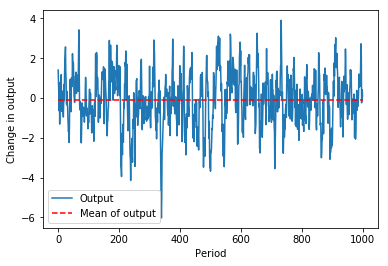

In [69]:
#Plot the output across time
plt.plot(output,label="Output")
#Plot the mean
plt.plot(mean_y,color="r",label="Mean of output",linestyle="dashed")
plt.xlabel("Period")
plt.ylabel("Change in output")
plt.legend()
plt.show()

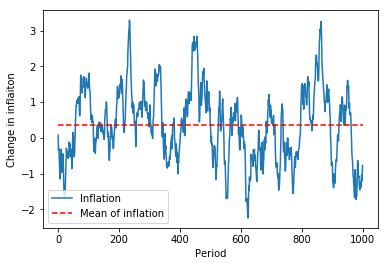

In [70]:
#Plot the inflation across time
plt.plot(inflation,label="Inflation")
#Plot the mean of inflation
plt.plot(mean_pi,color="r",label="Mean of inflation",linestyle="dashed")
plt.xlabel("Period")
plt.ylabel("Change in inflaiton")
plt.legend()
plt.show()

In [71]:
#Correlatation between inflation and output
#pearsons R is calculated using numpy
np.corrcoef(inflation,output)[0,1]

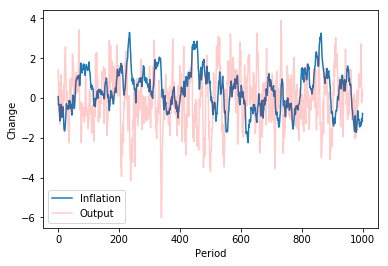

In [72]:
#Plot inflation and output across time
##Here we plot the two variables as time series. Output is faded so inflation is visible
plt.plot(inflation,label="Inflation",alpha=1)
plt.plot(output,color="r",label="Output",alpha=0.2)
plt.xlabel("Period")
plt.ylabel("Change")
plt.legend()
plt.show()

In order to calculate the autocorrelation, we define the two lists as a dataframe and use pandas to make lagged variables 

In [73]:
#create a dataframe in order to make lagged variables
##defin dictionary of coloumn names
d = {"inflation" : inflation, "output":output}
#make data frame 
df = pd.DataFrame(data=d)
df.head()

,inflation,output
0,0.074830,1.406367
1,-0.350344,0.878997
2,-0.304003,0.245455
3,-0.412872,-0.643367
4,-0.684640,0.527190


In [74]:
#Make lagged inflation
df["l_inflation"] = df["inflation"].shift(1)
#define an object for later
l_inflation = df["l_inflation"] 

#Make lagged output
df["l_output"] = df["output"].shift(1)
#define an object for later
l_output = df["l_output"]
df.head()

,inflation,output,l_inflation,l_output
0,0.074830,1.406367,NaN,NaN
1,-0.350344,0.878997,0.074830,1.406367
2,-0.304003,0.245455,-0.350344,0.878997
3,-0.412872,-0.643367,-0.304003,0.245455
4,-0.684640,0.527190,-0.412872,-0.643367


Now we can test for autocorrelation the inflation and the output :

In [75]:
#Autocorrelation of the inflation
np.corrcoef(inflation[1:999],l_inflation[1:999])[0,1]

The autocorrelation is very high (closed to 1) which means that the inflation heavily depend on its own level in the past. This result seems to make sense, indeed in the inflation equation there is a variable for the past inflation. This impact is positive and can be known in some circumstances as "self sustained inflation".

In [76]:
#Autocorrelation of the output
np.corrcoef(output[1:999],l_output[1:999])[0,1]

The output autocorrelation is high as well.

**Question 5**

We want to plot the evolution of the correlation between inflation and output regarding the level of phi. To do that we will fist change our inflation function to include phi as a paramater that we are able to change.

In [77]:
#create a new inflation function, phi as a variable
equil_piii= sm.lambdify((yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi),eq_pi_ar)
def equili_pi_phi (yt_m1, yt, pit_m1, st_m1, ct, phi, omega=pms['omega'], gamma=pms['gamma']):
    return equil_piii (yt_m1, yt, pit_m1, st_m1, ct, omega, gamma, phi)

Now we will create a function where we can set phi that will determine the correlation between the two variables. To find this correlation we will use a loop and the list of output and the list of inflation :

In [78]:
#define correlation function
def corr_func(phi,v_m=0, s_m=0):
    """This function takes 1 requires argument, that is phi. It return the correlation between inflation 
        and output for that phi level"""
    
    #Set seed
    np.random.seed(1)
    #define parameters
    pi_m = 0
    yn = 0
    y_m = 0
    
    #Simulate random shocks
    xt = np.random.normal(loc=0,scale=pms['sigma_x'],size=1000)
    ct = np.random.normal(loc=0,scale=pms['sigma_c'],size=1000)

    #Make list for output and inflation
    list_output = list(range(1000))
    list_inflation = list(range(1000))
    
    #Intiate for loop for 1000 periods
    for i in range(1000):
        #If it is the first period
        if i == 0 :
            #Calculate output
            y = equili_output_ar(v_m,pi_m,s_m,y_m,ct[i],xt[i])
            #record it
            list_output[i] = y
            #define output in this period
            yn = y
            
            #Calculate inflation
            p = equili_pi_phi(y_m,yn,pi_m,s_m,ct[i],phi)
            #Record it
            list_inflation[i] = p  
            
            #Define lagged inflation
            pi_m = p
            #Define lagged output
            y_m = y
            #define autoregressive parameters
            v_m = pms["delta"] * v_m + xt[i]
            s_m = pms["omega"] * s_m + ct [i] 
        #if it is not the first period
        else :
            #Calculate output
            y = equili_output_ar(v_m,pi_m,s_m,y_m,ct[i],xt[i])
            #record it
            list_output[i] = y
            #define output in this period
            yn = y
            
            #Calculate inflation
            p = equili_pi_phi(y_m,yn,pi_m,s_m,ct[i],phi)
            #Record it
            list_inflation[i] = p 
            
            #Define lagged inflation
            pi_m = p
            #Define lagged output
            y_m = y
            #define autoregressive parameters
            v_m = pms["delta"] * v_m + xt[i]
            s_m = pms["omega"] * s_m + ct[i]
            
    #use numpy to calculate correlation
    correlation = np.corrcoef(list_inflation,list_output)[0,1]

    return correlation

In [79]:
#Define relevant levels of phi 
phi_vec = np.linspace(0,1,1000)

#Make a list with space for corrlations
corr_list = list(range(1000))
#Initiate a for-loop
for i in range(1000) : 
    #for each phi simulate the model with the same shock, an calculate the shocks 
    ## this is a nested for-loop and can take som time
    corr = corr_func(phi = phi_vec[i])
    
    #recod the correlation
    corr_list[i] = corr 

#print the correlation to illutstrate that it worked
corr_list[0:9]
    

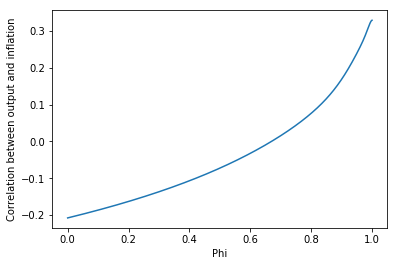

In [80]:
#Plot the correlation according Phi
plt.plot(phi_vec,corr_list)
plt.xlabel("Phi")
plt.ylabel("Correlation between output and inflation")
plt.show()

As we can see with this graph, as phi is increasing, the correlation between output and inflation is also increasing. Below is a slider where the reade can try to se the correlation for themselves

In [82]:
#Define a slider
phi_slider = widgets.FloatSlider(min=0,max=1,step = 0.01)
#call interact on the correlation function
widgets.interact(corr_func,phi=phi_slider,v_m = widgets.fixed(0),s_m = widgets.fixed(0))

interactive(children=(FloatSlider(value=0.0, description='phi', max=1.0, step=0.01), Output()), _dom_classes=(…

<function __main__.corr_func(phi, v_m=0, s_m=0)>

**Question 5**


We wish to optimize the correlation towards 0.31. Therefore we use a numerical optimizer and resticts it to only go towards 0.31. We have written out own brute force optimizer, that we use. This means that our optimiation can take up to 10-15 seconds on a resonable pc. 

In [83]:
#Define the autoregresive parameters for the first period 
v_m = 0 
s_m = 0
#Define the objectitve, which is the correlation
def objective(phi):
    return float(corr_func(phi, v_m, s_m))
#Define the constraints, which is 0.31 - the correlation 
def constraint(phi):
    return float((0.31 - corr_func(phi, v_m, s_m)))
#We have used float because we had some unknown issue that it resolved. 

In [84]:
#define the phi vector space
phi_vec = np.linspace(0.0,1,1000)

#Intiate a for loop - this 
for phi in phi_vec: 
    # x in the objective function given the phi level
    x = objective(phi)
    # y is the constraint function given the phi level
    y = constraint(phi)
    
    #Check if the the constrain is sufficiantly equal to 0 (3 decimals)
    if round(y,3) == 0:
        #If it is break the loop and print the phi and correlation values
        print("Optimization sucessful")
        print("Phi level =",phi,"and correlation optimized to",x)
        break 
    

Optimization sucessful
Phi level = 0.9879879879879879 and correlation optimized to 0.3098953977987362


## 3. Exchange economy

We define parameters:

In [87]:
#parameters:
N = 100
mu = np.array([3,2,1]) 
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]]) 
gamma = 0.8 
zeta = 1

#seed
seed = 1986 
np.random.seed(seed)

#preferances
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N)) 
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

beta1= betas[:,0]
beta2= betas[:,1]
beta3=betas[:,2]

alpha1= alphas[:,0]
alpha2= alphas[:,1]
alpha2= alphas[:,2]

#endowments
e1 = np.random.exponential(zeta,size=N) 
e2 = np.random.exponential(zeta,size=N) 
e3 = np.random.exponential(zeta,size=N) 

#### Exercise 3.1

We make a histogram and plot the betas:

<function matplotlib.pyplot.show(*args, **kw)>

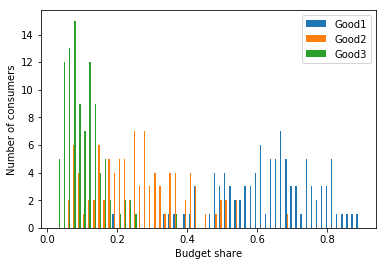

In [88]:
#plot an histogram
plt.hist(betas, bins = 60, label= ("Good1", 'Good2', 'Good3'))
plt.legend()
plt.xlabel('Budget share')
plt.ylabel('Number of consumers')
plt.show

#### Exercise 3.2

We define the demand and excess demand functions for each of the three goods. We have also converted the excess demand functions into one value by summing them up, to use later to find the equilibrium.

In [89]:
# Demand functions:
# We can eliminate p3 from the demand function, as it is equal to 1 (with p3*e3=e3)

def demand_good1 (beta1, p1, e1, p2, e2, e3):
    I= p1*e1 + p2*e2 + e3
    return beta1*(I/p1)

def demand_good2 (beta2, p1, e1, p2, e2, e3):
    I= p1*e1 + p2*e2 + e3
    return beta2*(I/p2)

def demand_good3 (beta3, p1, e1, p2, e2, e3):
    I= p1*e1 + p2*e2 + e3
    return beta2*(I)

In [90]:
# Excess demand functions:

def excess_demand_good1(beta1, p1, e1, p2, e2, e3):
  
    #demand
    demand = demand_good1(beta1, p1, e1, p2, e2, e3)
   
    #supply
    supply= e1
  
    #excess demand
    excess_demand= demand-supply
    
    return excess_demand

In [91]:
def excess_demand_good2(beta2, p1, e1, p2, e2, e3):
    
    #demand
    demand= demand_good2(beta2, p1, e1, p2, e2, e3)
  
    #supply
    supply= e2
    
    #excess demand
    excess_demand= demand- supply
    
    return excess_demand

In [92]:
def excess_demand_good1_value(beta1, p1, e1, p2, e2, e3):
  
    excess_demand_good1_value = np.sum(excess_demand_good1(beta1, p1, e1, p2, e2, e3))
    
    return excess_demand_good1_value

In [93]:
def excess_demand_good2_value(beta2, p1, e1, p2, e2, e3):
    
    #demand
    excess_demand_value2= np.sum(excess_demand_good2(beta2, p1, e1, p2, e2, e3))
    
    return excess_demand_value2

We make two 3D plots for the excess demands of goods 1 and 2.

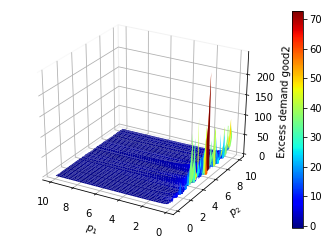

In [94]:
# We make a 3D plot of excess demand for good 1:
# a. prices 
p1_vec = np.linspace(0.1,10,100)
p2_vec = np.linspace(0.1,10,100)
                     
# b. plot
p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')
excess_demand_good1_grid = excess_demand_good1(beta1,p1_grid,e1,p2_grid,e2,e3)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(p1_grid,p2_grid,excess_demand_good1_grid,cmap=cm.jet)

# c. add labels
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('Excess demand good2')

# d. invert xaxis
ax.invert_xaxis()

# e. remove background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# f. add colorbar
fig.colorbar(cs);
plt.show()

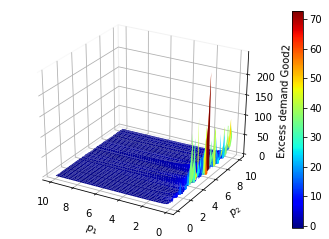

In [95]:
# We make a 3d plot of excess demand for good 2:

# a. plot
p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')
excess_demand_good2_grid = excess_demand_good2(beta2,p1_grid,e1,p2_grid,e2,e3)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(p1_grid,p2_grid,excess_demand_good1_grid,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('Excess demand Good2')

# c. invert xaxis
ax.invert_xaxis()

# d. remove background
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# e. add colorbar
fig.colorbar(cs);
plt.show()

#### Excercise 3.3

Just like in the lecture, we use a while loop to determine the equilibrium prices, for which excess demands are both zero. We set out guesses for the prices to one.

In [96]:
def find_equilibrium(betas, p1, e1, p2, e2, e3, kappa=0.5,eps=1e-8,maxiter=10000):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good1_value(beta1, p1, e1, p2, e2, e3)
        Z2 = excess_demand_good2_value(beta2, p1, e1, p2, e2, e3)
        
        # b: step 2: stop?
        if np.abs(Z1) < eps and np.abs(Z2) < eps or t >= maxiter:
            print(f'{t}: p1= {p1} -> excess demand Z1= {Z1}')
            print(f'{t}: p2= {p2} -> excess demand Z2= {Z2}')
            break 

        # c. step 3: update p1
        p1 = p1 + kappa*Z1/N
        p2 = p2 + kappa*Z2/N
        
            
        t += 1   

    return p1, p2

In [97]:
p1,p2= find_equilibrium(betas, 1, e1, 1, e2, e3)

1844: p1= 6.149742400548352 -> excess demand Z1= 9.996033889514422e-09
1844: p2= 2.685539126759021 -> excess demand Z2= 4.059743818896067e-09


After 1844 iterations, we find the equilibrium prices of around 6.15 for p1 and 2.67 for p2. P3 is normalized to 1. 

We check to make sure that demand is really smaller than epsilon.

In [98]:
eps=1e-8
Z1 = excess_demand_good1_value(beta1, p1, e1, p2, e2, e3)
Z2 = excess_demand_good2_value(beta2, p1, e1, p2, e2, e3)
print(Z1,Z2)
assert(np.abs(Z1) < eps)
assert(np.abs(Z2) < eps)

9.996033889514422e-09 4.059743818896067e-09


#### Excercise 3.4

We define the utility function, insert the above calculated equilibrium prices in the function and plot it as a histogram. 

In [99]:
# Defining the utility function
def utility(betas, p1, e1, p2, e2, e3, gamma):
    x1= demand_good1(betas[:,0], p1, e1, p2, e2, e3)
    x2= demand_good2(betas[:,1], p1, e1, p2, e2, e3)
    x3= demand_good3(betas[:,2], p1, e1, p2, e2, e3)
    
    utility= (x1**beta1+x2**beta2+x3**beta3)**gamma 

    return utility

In [100]:
# Inserting equilibrium prices
utility_dist = utility(betas, 6.149742400548352, e1, 2.685539126759021, e2, e3, gamma)

<function matplotlib.pyplot.show(*args, **kw)>

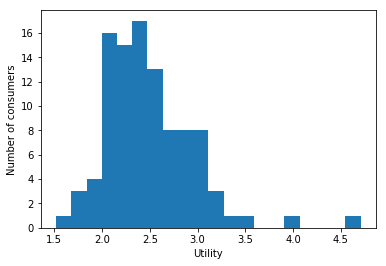

In [101]:
# Making a histogram
plt.hist(utility_dist, bins= 20)
plt.xlabel('Utility')
plt.ylabel('Number of consumers')
plt.show

Lastly, we calculate mean and variance.

In [102]:
np.mean(utility_dist)

In [103]:
np.var(utility_dist)